<a href="https://colab.research.google.com/github/sudhirprc/mlproject/blob/main/Microsoft_Stocks_Forecasting_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df=pd.read_csv('MSFT.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9655,2024-07-08,466.549988,467.700012,464.459991,466.239990,466.239990,12962300
9656,2024-07-09,467.000000,467.329987,458.000000,459.540009,459.540009,17207200
9657,2024-07-10,461.220001,466.459991,458.859985,466.250000,466.250000,18196100
9658,2024-07-11,462.980011,464.779999,451.549988,454.700012,454.700012,23111200


df= df[['Date','Close']]
df


In [3]:
df= df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9655,2024-07-08,466.239990
9656,2024-07-09,459.540009
9657,2024-07-10,466.250000
9658,2024-07-11,454.700012


In [4]:
df['Date']


0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9655    2024-07-08
9656    2024-07-09
9657    2024-07-10
9658    2024-07-11
9659    2024-07-12
Name: Date, Length: 9660, dtype: object

In [7]:
from os.path import split
import datetime

def str_to_datetime(s):
  split=s.split('-')
  year,month,day=int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [8]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9655,2024-07-08,466.239990
9656,2024-07-09,459.540009
9657,2024-07-10,466.250000
9658,2024-07-11,454.700012


In [9]:
df['Date'] =df['Date'].apply(str_to_datetime)
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9655,2024-07-08,466.239990
9656,2024-07-09,459.540009
9657,2024-07-10,466.250000
9658,2024-07-11,454.700012


In [10]:
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-07-08,466.239990
2024-07-09,459.540009
2024-07-10,466.250000


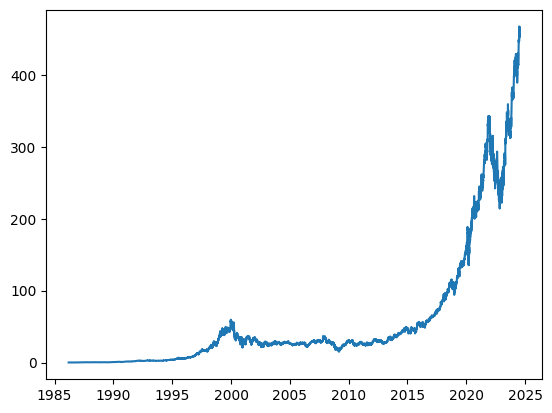

In [11]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [22]:
import numpy as np
def df_to_windowed_df(dataframe,first_date_str,last_date_str,n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2023-07-13',
                                '2024-07-12',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-07-13,331.829987,332.470001,337.200012,342.660004
1,2023-07-14,332.470001,337.200012,342.660004,345.239990
2,2023-07-17,337.200012,342.660004,345.239990,345.730011
3,2023-07-18,342.660004,345.239990,345.730011,359.489990
4,2023-07-19,345.239990,345.730011,359.489990,355.079987
...,...,...,...,...,...
247,2024-07-08,459.279999,460.769989,467.559998,466.239990
248,2024-07-09,460.769989,467.559998,466.239990,459.540009
249,2024-07-10,467.559998,466.239990,459.540009,466.250000
250,2024-07-11,466.239990,459.540009,466.250000,454.700012


In [23]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

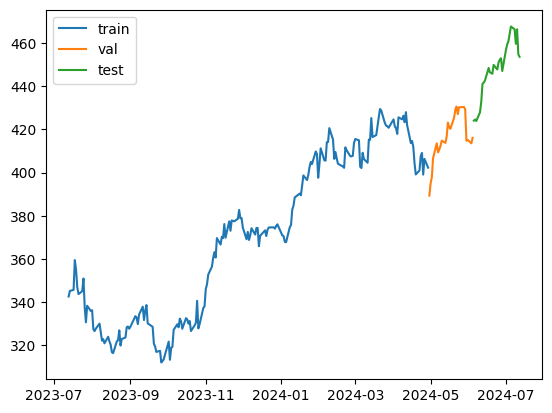

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['train', 'val', 'test'])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation="relu"),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss="mse",
              optimizer=Adam(learning_rate=0.001),
              metrics=["mean_absolute_error"])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 161ms/step - loss: 137690.5000 - mean_absolute_error: 369.2599 - val_loss: 172798.3438 - val_mean_absolute_error: 415.5487
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 137306.9375 - mean_absolute_error: 368.7387 - val_loss: 172400.0000 - val_mean_absolute_error: 415.0690
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 136935.9062 - mean_absolute_error: 368.2341 - val_loss: 171962.2969 - val_mean_absolute_error: 414.5415
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 136553.0781 - mean_absolute_error: 367.7169 - val_loss: 171519.6562 - val_mean_absolute_error: 414.0073
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 136136.8281 - mean_absolute_error: 367.1483 - val_loss: 170993.5938 - val_mean_absolute_error: 413.3714
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 135596.8125 - mean_absolute_error: 366.4112 - val_

7/7 [==============================] - 0s 3ms/step


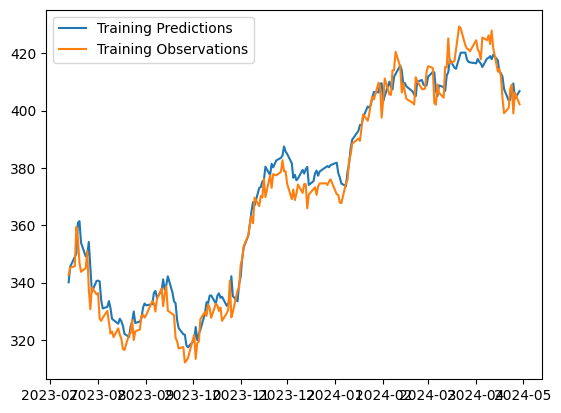

In [26]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


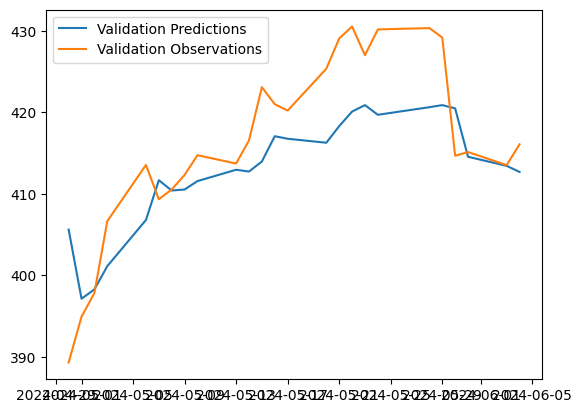

In [27]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 30ms/step


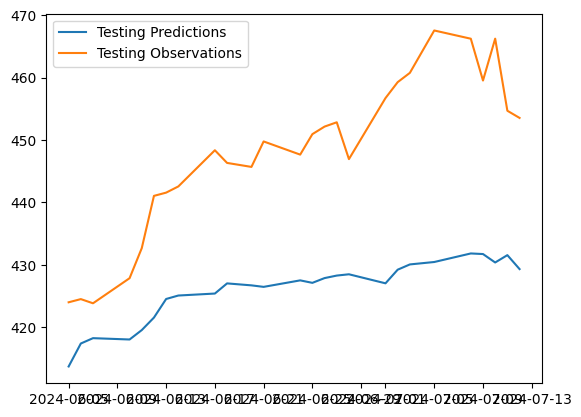

In [28]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

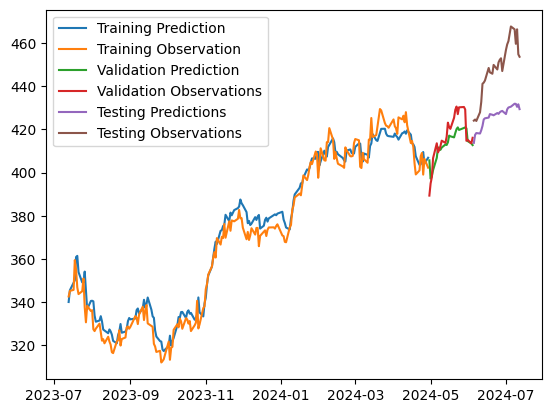

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Prediction',
            'Training Observation',
            'Validation Prediction',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [31]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


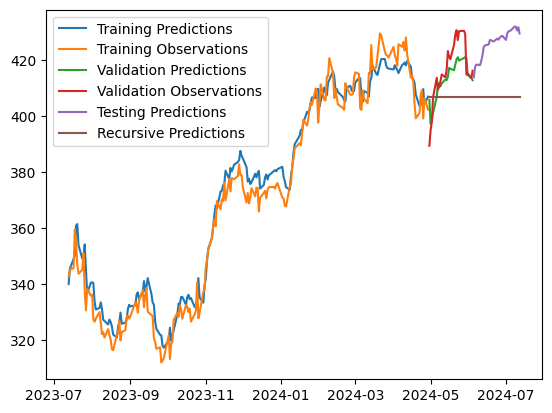

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Recursive Predictions'])